In [1]:
from pathlib import Path
import sys
sys.path.append('../bitome-kb/')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse as sparse
import seaborn as sns
from bitome.core import Bitome
from math import log,exp,inf
# [MODIFIED]
#bitome = Bitome.init_from_file('../bitome-kb/bitome.pkl')

bitome = Bitome(Path('../bitome-kb/data', 'NC_000913.3.gb'))
bitome.load_data(regulon_db=True)

/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b0064
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b0142
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:328: UserWarning: No GEM-PRO file found for b4586
  warn(f'No GEM-PRO file found for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b0292
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the sa

/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b3039
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b3453
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:328: UserWarning: No GEM-PRO file found for b4613
  warn(f'No GEM-PRO file found for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b3701
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the sa

In [12]:
from feature_functions import *
from pymodulon.io import load_json_model
import pymodulon
# from pymodulon.visualization import *

# for plotting circos plot
import pycircos
import collections
import matplotlib.pyplot as plt
# Garc    = pycircos.Garc
# Gcircle = pycircos.Gcircle

# Plotting promoter position

In [3]:
promoter_df = pd.DataFrame(columns=['tss', 'tfbs_loc', 'strand', 'box_10', 'box_35'])

for p in bitome.promoters:
    if p.tss == None or p.tss < 200:
        continue
    if p.transcription_unit == None or len(p.transcription_unit.genes)==0:
        continue
        
    if len(p.tf_binding_sites) == 0:
        continue
        
    promoter_df.at[p.name, 'tss'] = p.tss
    promoter_df.at[p.name, 'strand'] = p.tss_location.strand
    tfbs_list = []
    for s in p.tf_binding_sites:
        tfbs = [int(s.location.start), int(s.location.end)]
        tfbs_list.append(tfbs)

    promoter_df.at[p.name, 'tfbs_loc'] = tfbs_list
    
    if p.box_10_location != None:
        promoter_df.at[p.name, 'box_10'] = [int(p.box_10_location.start),int(p.box_10_location.end)]
        promoter_df.at[p.name, 'box_35'] = [int(p.box_35_location.start),int(p.box_35_location.end)]
    else:
        promoter_df.at[p.name, 'box_10'] = None
        promoter_df.at[p.name, 'box_35'] = None
    
promoter_df.sort_values(by='tss',inplace=True)

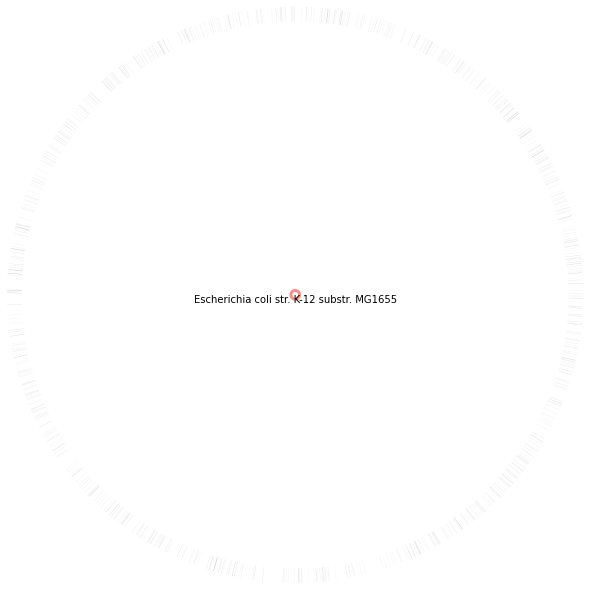

In [9]:
circle = Gcircle()

arc = Garc(arc_id='NC_000913', size=len(bitome.sequence), raxis_range=(10,0), interspace=0, linewidth=0,
       label="Escherichia coli str. K-12 substr. MG1655", label_visible=True)

circle.add_garc(arc)

circle.set_garcs()

# import collections

circle.barplot('NC_000913', data=np.array([10]*promoter_df.shape[0]), positions=np.array(promoter_df['tss'], dtype=float), 
                   width=np.array([50]*promoter_df.shape[0]), raxis_range=[1050,950], facecolor="k"
                  )    

In [10]:
positions = []
widths = []
for i in range(promoter_df.shape[0]):
    if len(promoter_df['tfbs_loc'][i])>0:
        for tfbs in promoter_df['tfbs_loc'][i]:
            positions.append(mean(tfbs))
            widths.append(tfbs[1]-tfbs[0])

widths = [i*50 for i in widths] 

In [11]:
circle.barplot('NC_000913', data=np.array([10]*len(widths)), positions=positions, 
                   width=widths, raxis_range=[850,940], facecolor="midnightblue"
                  )   

In [12]:
positions = []
widths = []
for i in range(promoter_df.shape[0]):
    if promoter_df['box_10'][i] != None:
        box_10 = promoter_df['box_10'][i]
        positions.append(mean(box_10))
        widths.append(box_10[1]-box_10[0])
        
widths = [i*50 for i in widths] 

In [13]:
circle.barplot('NC_000913', data=np.array([10]*len(widths)), positions=positions, 
                   width=widths, raxis_range=[750,840], facecolor="darkred"
                  ) 

In [14]:
positions = []
widths = []
for i in range(promoter_df.shape[0]):
    if promoter_df['box_35'][i]!=None:
        box_35 = promoter_df['box_35'][i]
        positions.append(mean(box_35))
        widths.append(box_35[1]-box_35[0])
            
widths = [i*50 for i in widths] 

circle.barplot('NC_000913', data=np.array([10]*len(widths)), positions=positions, 
                   width=widths, raxis_range=[750,840], facecolor="darkred"
                  ) 

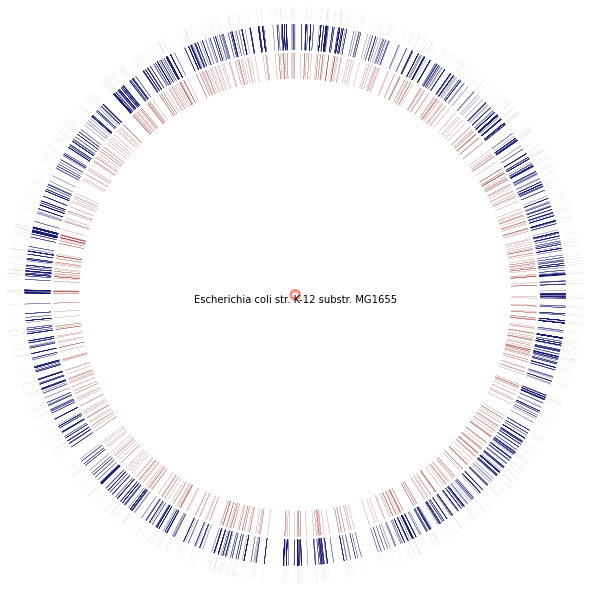

In [15]:
# doesn't include ones that don't have tfbs

circle.figure

In [194]:
# circle.figure.savefig("circos.pdf")

# 1. Load shape data
* Unzip ecoli_U00096_shape.pickle.zip in data folder
* change file path to the path of ecoli_U00096_shape.pickle

In [13]:
shape_table = pd.read_pickle('../data/ecoli_U00096_shape.zip')

FileNotFoundError: [Errno 2] No such file or directory: '../data/ecoli_U00096_shape.zip'

In [ ]:
bitome._shape_data = shape_table

In [ ]:
shape_table

# 2. Load IM membership

In [ ]:
# [MODIFIED] change to precise1

import ast
im_info = pd.read_csv('../data/precise1_im_info.csv')

In [ ]:
IM_genes = {}
for i in range(len(im_info['im_name'])):
    IM_genes[im_info['im_name'][i]] = ast.literal_eval( im_info['genes'][i] )
IM_genes.keys()

# 3. Load PSSMs

### Load Sigma PSSM

In [6]:
import pickle
# reading the data from the file 
with open('../data/sigma_pssm_ecoli.txt', 'rb') as handle: 
    data = handle.read()  
# reconstructing the data as dictionary 
d = pickle.loads(data)
M_prib = d['M_prib']
M_m35 = d['M_m35']
m10_seq = d['m10_seq']
m35_seq = d['m35_seq']

### Extract IM motifs

In [7]:
# n_promoters_dict = {}
# for IM in list(pwm_im.keys()):
#     if IM not in list(IM_genes.keys()):
#         continue
#     n_promoters = len(IM_motif_finder(IM))
#     n_promoters_dict[IM] = n_promoters

In [8]:
# [MODIFIED]
def IM_motif_finder(IM_name, search_range=150):
    # 150 upstream, 30 downstream
    tss_list = []
    for g in bitome.genes:
        if g.locus_tag in IM_genes[IM_name]:
            for tu in g.transcription_units:
                if tu.tss != None:
                    #print(tu.name, tu.tss, tu.location.strand)
                    tss_list.append(tu.tss)

    tss_list = sorted(list(set(tss_list)))
    #print(tss_list)
    s_range = []
    count=0
    start = tss_list[-1]
    for i in range(len(tss_list)):
        if i in range(len(tss_list))[tss_list.index(start):tss_list.index(start)+count+1]: 
            continue

        #print(tss_list[i])
        overlap_tss = [tss_list[i]]
        count = 0
        
        if i == len(tss_list)-1:
            s_range.append((tss_list[i], tss_list[i]))
            continue
        
        for r in tss_list[i+1:]:
            if tss_list[i] in range(r-search_range, r+search_range):
                overlap_tss.append(r)
                count += 1
                
            end = max(overlap_tss)
            start = min(overlap_tss)

        s_range.append((start, end))

    #print(s_range)
    s_list = []
    for (start,end) in s_range:
        s = str(bitome.sequence)[ start-search_range:end+search_range]
        s_list.append(s)
    
    motif_file = open(r'motif_sequence.fasta', 'w+')
    out = '\n'.join(['>TSS' + str(i+1) + "\n" + j for i,j in enumerate(s_list)])
    motif_file.write(out)
    motif_file.close()
        
    return s_list

In [9]:
# output will be store in a fasta file that can be pasted to MEME
# The generated im motifs are stored in ../motif_logodds.txt
s_list = IM_motif_finder('CdaR')

NameError: name 'IM_genes' is not defined

###  Load TF and IM motifs

In [5]:
# [MODIFIED] Correct inconsistent naming in motif_logodds.txt
pwm_db = rpwm('../data/motif_pwm_db.txt')
pwm_im = rlogodds('../data/motif_logodds.txt')
IM_motif_to_use = list( set(pwm_im.keys())&set(IM_genes.keys()) )


# <MODIFIED> Added TF genes corresponding to the manually added motif below
tf_genes = ['araC', 'arcA', 'argR','argP','baeR','basR','cysB', 'cpxR', 'cra',
       'crp', 'mlc','mqsA' ,'evgA', 'exuR', 'fadR','iclR','ihfA','ihfB','iscR','fhlA','flhD','flhC', 'fnr',
       'fur','gadE','gadW','gadX','galR','galS','gcvA', 'glpR','glrR','gntR', 'tyrR','lexA','leuO',
        'lrp', 'malT', 'metJ','nac', 'nagC','nanR' ,'narL','narP','nrdR','nsrR',
        'glnG','ompR','oxyR','pdhR','phoB','phoP','purR', 'puuR', 'rcsA','rcsB','rhaS','rutR','soxS', 'trpR', 'xylR','ydeO'
         # [MODIFIED] Added ones  
        ,'yehT', 'cbl', 'ypdB', 'ilvY', 'allR', 'yiaJ', 'zur', 'zntR', 'rbsR', 'prpR', 'cueR', 'yedW', 'cusR', 'atoC']

NameError: name 'IM_genes' is not defined

In [7]:
len(tf_list)

73

In [6]:
# <MODIFIED> Added manually constructed motif without alignment
tf_list =['AraC', 'ArcA', 'ArgP', 'ArgR', 'BaeR', 'BasR', 'CysB', 'CpxR', 
          'Cra', 'CRP', 'Mlc', 'MqsA', 'EvgA', 'ExuR', 'FadR', 'IclR', 'IscR', 
          'IHF', 'FhlA', 'FlhDC', 'FNR', 'Fur', 'GadE', 'GadW', 'GadX', 'GalR', 'GalS', 
          'GcvA', 'GlpR', 'GlrR', 'GntR', 'TyrR', 'LexA', 'LeuO', 'Lrp', 'MalT', 'MetJ', 'Nac', 
          'NagC', 'NanR', 'NarL', 'NarP', 'NrdR', 'NsrR', 'NtrC', 'OmpR', 'OxyR', 'PdhR', 'PhoB', 'PhoP',
          'PurR', 'PuuR', 'RcsAB', 'RhaS', 'RutR', 'SoxS', 'TrpR', 'XylR', 'YdeO'
         # [MODIFIED] Added ones
         ,'BtsR', 'Cbl', 'PyrR', 'IlvY', 'AllR', 'PlaR', 'Zur', 'ZntR', 'RbsR', 'PrpR', 'CueR', 'HprR', 'CusR', 'AtoC']

# [MODIFIED]: accounting for synonymous naming
regulon_genes={}
for TF in bitome.transcription_factors:
    #print(TF.name)
    # Only include the TF that is included in the tf_list, those are the tf that we have logodds and pwm data.
    if TF.name == 'YpdB':
        tfname = 'PyrR'
    elif TF.name == 'YehT':
        tfname = 'BtsR'
    elif TF.name == 'YiaJ':
        tfname = 'PlaR'
    elif TF.name == 'YedW':
        tfname = 'HprR'
    else:
        tfname = TF.name
    if tfname in tf_list:
        regulon_genes[tfname] = []   
        for r in TF.regulons:
                for p in list(r.regulated_promoters.values())[0]:
                    if p.transcription_unit != None and len(p.transcription_unit.genes)>0:
                        for g in p.transcription_unit.genes:
                            regulon_genes[tfname].append( g.name)

In [15]:
regulon_genes.keys()

dict_keys(['TyrR', 'ArgP', 'CpxR', 'FNR', 'CRP', 'Mlc', 'Nac', 'SoxS', 'OxyR', 'PhoB', 'CysB', 'ArcA', 'Lrp', 'FhlA', 'IscR', 'GadX', 'GadW', 'PhoP', 'NarL', 'NarP', 'EvgA', 'ArgR', 'FadR', 'IclR', 'NagC', 'CusR', 'Zur', 'GadE', 'GntR', 'ExuR', 'TrpR', 'MalT', 'PdhR', 'YdeO', 'AraC', 'RhaS', 'GcvA', 'NanR', 'GalS', 'GalR', 'GlpR', 'LexA', 'PurR', 'IlvY', 'AtoC', 'Cra', 'LeuO', 'RbsR', 'Cbl', 'XylR', 'PlaR', 'PrpR', 'AllR', 'BaeR', 'NsrR', 'NrdR', 'RutR', 'MetJ', 'MqsA', 'GlrR', 'BtsR', 'BasR', 'PyrR', 'PuuR', 'HprR', 'IHF', 'CueR', 'Fur', 'ZntR', 'NtrC', 'FlhDC', 'RcsAB', 'OmpR'])

In [16]:
# cobvert gene name and b number.
b_g = {}
for g in bitome.genes:
    b_g[g.name] = g.locus_tag

In [17]:
# test runtime
import timeit
start = timeit.default_timer()

gltX = bitome.transcription_units[220]
tempr= bitome.motif_match(pwm_im,  gltX,'Cra' , True, True)

stop = timeit.default_timer()

print('Time: ', stop - start) 
print(tempr)

Time:  0.016063600000052247
{'Cra im Matched Motif': 'CAACGAAAACAATAATGCGTAAGGTAGAA', 'Cra im score': -531, 'Cra im upstreamTSS': 1, 'Cra im distToTSS': 16.0, 'Cra im HelT_avg': 34.78068965517242, 'Cra im HelT_range': 4.095000000000006, 'Cra im MGW_avg': 5.073448275862069, 'Cra im MGW_range': 2.3600000000000003, 'Cra im ProT_avg': -8.945862068965518, 'Cra im ProT_range': 12.99, 'Cra im Roll_avg': -0.5175862068965518, 'Cra im Roll_range': 6.425000000000001, 'Cra im HelT_max': 36.915000000000006, 'Cra im HelT_min': 32.82, 'Cra im MGW_max': 6.11, 'Cra im MGW_min': 3.75, 'Cra im ProT_max': -1.48, 'Cra im ProT_min': -14.47, 'Cra im Roll_max': 2.4800000000000004, 'Cra im Roll_min': -3.9450000000000003, 'Cra im Shift_avg': 0.025172413793103452, 'Cra im Shift_range': 0.5750000000000001, 'Cra im Slide_avg': -1.3941379310344828, 'Cra im Slide_range': 0.8500000000000001, 'Cra im Rise_avg': 3.3168965517241378, 'Cra im Rise_range': 0.3700000000000001, 'Cra im TilT_avg': 0.17310344827586208, 'Cra im

# 4. Generate feature matrix

In [18]:
motif_feature = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None or int(tu.tss) < 200:
            continue
            
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        data['strand'] = int(tu.location.strand)
        data['TU_length'] = len(tu.sequence)
        
        # replication strand
        data['leading'] = 0
        data['lagging'] = 0
        data['terminus'] = 0
        data[ str(g.replication_strand) ] = 1
        
        #sigmulon features ( sigma 38 excluded )
        for signame in m10_seq.keys():
            result = bitome.score_pribnow_m35( tu, signame, M_prib, M_m35,m10_seq,m35_seq)
            result.pop(signame+'_Matched_Prib')
            result.pop(signame+'_Matched_m35')
            data.update( result )
            
        #USR and DSR
        data['USR_AT'] = bitome.USR_AT(tu)
        data['DSR_AG'] = bitome.DSR_AG(tu)
        
        #TF and IM motif features
        for tf in list(pwm_db.keys()):
            result = bitome.motif_match(pwm_db,  tu,  tf, False,False)
            result.pop(tf+' Matched Motif')
            data.update(result)
        
        for im in IM_motif_to_use:
            result = bitome.motif_match(pwm_im,  tu, im, True,False)
            result.pop(im +' im'+' Matched Motif')
            data.update(result)
        
        #distance features    
        for tg in tf_genes:
            data['distTo_'+tg] = bitome.inter_gene_distance(g,bitome.get_gene(tg))
            
        data['distToOrigin'] = g.origin_distance
        data['distToTer'] = g.terminus_distance
        data['Ori/(Ori+Ter)'] = g.origin_distance/(g.origin_distance+g.terminus_distance)
        data['orderInOperon'] = g.position_in_operon
        
        for tf in regulon_genes.keys():
            regulon_list = regulon_genes[tf]
            data['distTo_'+tf+'_regulated'] = bitome.distToRegulon(g, regulon_list )
            
        data.update( bitome.nucleotide_composition( tu ) )
        
        motif_feature.append(data)

In [19]:
motif_data = pd.DataFrame(motif_feature)
motif_data.head()

,ID,gene,TU,strand,TU_length,leading,lagging,terminus,Sigma70_Prib_Start,Sigma70_Prib_score,...,CG%,CT%,GA%,GC%,GG%,GT%,TA%,TC%,TG%,TT%
0,b0008,talB,talB,1,1040,1,0,0,-13,-4.060455,...,0.075072,0.068335,0.070260,0.075072,0.060635,0.055823,0.044273,0.062560,0.071222,0.040423
1,b0014,dnaK,dnaK-tpke11-dnaJ,1,3251,1,0,0,-11,-8.656225,...,0.077231,0.054154,0.076000,0.080000,0.061538,0.058769,0.036000,0.048923,0.076308,0.045231
2,b0014,dnaK,dnaK-tpke11-dnaJ,1,3176,1,0,0,-13,-6.814542,...,0.078110,0.054488,0.075906,0.080630,0.062362,0.058583,0.036220,0.049134,0.076220,0.044724
3,b0014,dnaK,dnaK-tpke11-dnaJ,1,3155,1,0,0,-15,-6.423808,...,0.078313,0.054851,0.075460,0.081167,0.062777,0.058973,0.036145,0.049461,0.076094,0.045022
4,b0015,dnaJ,dnaK-tpke11-dnaJ,1,3251,1,0,0,-11,-8.656225,...,0.077231,0.054154,0.076000,0.080000,0.061538,0.058769,0.036000,0.048923,0.076308,0.045231


### DNA shape at TSS
#### HelT	Roll	Shift	Slide	Rise	TilT	Buckle	Shear	Stretch	Stagger	Opening	MGW	ProT	EP	

In [20]:
n_up = 40
n_down = 10

shape_feature = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None or int(tu.tss) < 200:
            continue
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        TSS= tu.tss
        if int(tu.location.strand) == -1:
            start = TSS - n_up
            end = TSS + n_down
        else:
            start = TSS - n_down
            end= TSS + n_up
            
        table = get_shape(start,end,shape_table)
        helt =  list(table['HelT'])
        roll =  list(table['Roll'])
        mgw = list(table['MGW'])
        prot=  list(table['ProT'])
        slide = list(table['Slide'])
        stretch = list(table['Stretch'])
        stagger = list(table['Stagger'])
        opening = list(table['Opening'])
        ep = list(table['EP'])
        shift = list(table['Shift'])
        rise = list(table['Rise'])
        tilt = list(table['TilT'])
        buckle = list(table['Buckle'])
        shear = list(table['Shear'])
        
        
        if tu.location.strand == -1:
            helt.reverse()
            mgw.reverse()
            prot.reverse()
            roll.reverse()
            slide.reverse()
            stretch.reverse()
            stagger.reverse()
            opening.reverse()
            ep.reverse()
            shift.reverse()
            rise.reverse()
            tilt.reverse()
            buckle.reverse()
            shear.reverse()
        
        # [Modified] Added updated shape features
        temp = {'HelT':helt, 'MGW':mgw,'ProT':prot, 'Roll':roll,'Slide':slide,
                'Stretch':stretch,'Stagger': stagger,'Opening':opening,'EP': ep, 
                'Shift': shift, 'Rise': rise, 'TilT': tilt, 'Buckle': buckle, 'Shear': shear}
        for shape in temp.keys():
            for i in range(51):
                index = i - 40
                data[shape+'_TSS_'+ str(index)] = temp[shape][i]
                
        shape_feature.append(data)

In [21]:
shape_data = pd.DataFrame(shape_feature)
shape_data.head()

,ID,gene,TU,HelT_TSS_-40,HelT_TSS_-39,HelT_TSS_-38,HelT_TSS_-37,HelT_TSS_-36,HelT_TSS_-35,HelT_TSS_-34,...,Shear_TSS_1,Shear_TSS_2,Shear_TSS_3,Shear_TSS_4,Shear_TSS_5,Shear_TSS_6,Shear_TSS_7,Shear_TSS_8,Shear_TSS_9,Shear_TSS_10
0,b0008,talB,talB,34.040,35.340,33.355,33.780,34.870,32.590,32.525,...,0.12,0.15,0.14,-0.28,0.06,-0.26,0.07,0.15,0.15,-0.10
1,b0014,dnaK,dnaK-tpke11-dnaJ,34.735,36.225,35.075,33.000,33.200,34.495,32.900,...,0.15,0.18,-0.16,-0.10,-0.27,-0.28,-0.29,0.26,0.11,-0.24
2,b0014,dnaK,dnaK-tpke11-dnaJ,34.230,35.045,34.210,34.345,33.210,33.865,35.550,...,-0.27,0.09,0.28,-0.28,-0.15,-0.15,-0.08,0.11,-0.26,0.08
3,b0014,dnaK,dnaK-tpke11-dnaJ,33.865,33.425,35.170,35.105,34.455,33.415,34.110,...,0.16,-0.16,-0.10,-0.25,-0.27,-0.11,0.10,-0.10,0.27,-0.27
4,b0015,dnaJ,dnaK-tpke11-dnaJ,34.735,36.225,35.075,33.000,33.200,34.495,32.900,...,0.15,0.18,-0.16,-0.10,-0.27,-0.28,-0.29,0.26,0.11,-0.24


In [22]:
data_table = pd.concat([motif_data, shape_data[shape_data.columns[3:]]], axis=1)
data_table.head()

,ID,gene,TU,strand,TU_length,leading,lagging,terminus,Sigma70_Prib_Start,Sigma70_Prib_score,...,Shear_TSS_1,Shear_TSS_2,Shear_TSS_3,Shear_TSS_4,Shear_TSS_5,Shear_TSS_6,Shear_TSS_7,Shear_TSS_8,Shear_TSS_9,Shear_TSS_10
0,b0008,talB,talB,1,1040,1,0,0,-13,-4.060455,...,0.12,0.15,0.14,-0.28,0.06,-0.26,0.07,0.15,0.15,-0.10
1,b0014,dnaK,dnaK-tpke11-dnaJ,1,3251,1,0,0,-11,-8.656225,...,0.15,0.18,-0.16,-0.10,-0.27,-0.28,-0.29,0.26,0.11,-0.24
2,b0014,dnaK,dnaK-tpke11-dnaJ,1,3176,1,0,0,-13,-6.814542,...,-0.27,0.09,0.28,-0.28,-0.15,-0.15,-0.08,0.11,-0.26,0.08
3,b0014,dnaK,dnaK-tpke11-dnaJ,1,3155,1,0,0,-15,-6.423808,...,0.16,-0.16,-0.10,-0.25,-0.27,-0.11,0.10,-0.10,0.27,-0.27
4,b0015,dnaJ,dnaK-tpke11-dnaJ,1,3251,1,0,0,-11,-8.656225,...,0.15,0.18,-0.16,-0.10,-0.27,-0.28,-0.29,0.26,0.11,-0.24


In [23]:
data_table.to_csv('../data/data_precise1_plus.csv', index = None)

## Averaging  by genes

In [24]:
data_table = pd.read_csv('../data/data_precise1_plus.csv')

In [25]:
data_table['TU'].unique().shape

(1592,)

In [26]:
unique_ids = np.unique(list(data_table['ID']))

multiple_ids = {}
for n in unique_ids:
    if list(data_table['ID']).count(n) > 1:
        multiple_ids[n] = list(data_table['ID']).count(n)

remove_list = []
length = len(data_table['ID'])
for i in range(length):
    if data_table.iloc[i,0] in multiple_ids.keys():
        remove_list.append(i)

single_features = data_table.drop(remove_list)
single_features = single_features.reset_index()
single_features = single_features.drop(columns=['index'])
single_features = single_features[['ID']+list(single_features.columns)[3:]]

In [27]:
featureList = list(single_features.columns)[1:]
multi = {}
for g in multiple_ids.keys():
    multi[g] = {}
    multi[g]['ID'] = str(g)
    for f in featureList:
        multi[g][f] = 0
        
for i in range(len(data_table['ID']) ):
    if data_table['ID'][i] in multiple_ids.keys():
        for f in featureList:
            multi[ str(data_table['ID'][i]) ][f] += float(data_table[f][i]/multiple_ids[str(data_table['ID'][i])])

In [28]:
multi_table = []
for k in multi.keys():
    multi_table.append(multi[k])
multi_pd = pd.DataFrame(multi_table)

In [29]:
avg_features = single_features.append(multi_pd)
avg_features=avg_features.reset_index()
avg_features=avg_features.drop(columns=['index'])
avg_features.head()

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,ID,strand,TU_length,leading,lagging,terminus,Sigma70_Prib_Start,Sigma70_Prib_score,Sigma70_Prib_hmd,Sigma70_Prib_Tm,...,Shear_TSS_1,Shear_TSS_2,Shear_TSS_3,Shear_TSS_4,Shear_TSS_5,Shear_TSS_6,Shear_TSS_7,Shear_TSS_8,Shear_TSS_9,Shear_TSS_10
0,b0008,1.0,1040.0,1.0,0.0,0.0,-13.0,-4.060455,1.0,14.0,...,0.12,0.15,0.14,-0.28,0.06,-0.26,0.07,0.15,0.15,-0.10
1,b0025,1.0,5897.0,1.0,0.0,0.0,-12.0,-3.290289,1.0,14.0,...,-0.09,-0.27,0.09,-0.10,0.11,0.27,-0.27,0.24,-0.26,-0.27
2,b0034,1.0,478.0,1.0,0.0,0.0,-13.0,-4.642584,2.0,14.0,...,-0.24,0.26,-0.13,-0.10,0.27,0.10,0.15,0.15,0.15,0.26
3,b0035,-1.0,7920.0,0.0,1.0,0.0,-12.0,-5.778186,2.0,14.0,...,0.16,0.10,-0.09,0.08,-0.10,0.14,0.10,-0.12,-0.16,-0.16
4,b0036,-1.0,7920.0,0.0,1.0,0.0,-12.0,-5.778186,2.0,14.0,...,0.16,0.10,-0.09,0.08,-0.10,0.14,0.10,-0.12,-0.16,-0.16


In [30]:
avg_features.to_csv('../data/features_avg_precise1_plus.csv',index=None)

# 5. assess motif quality by t-test

In [31]:
from scipy.stats import ttest_ind

In [32]:
im_motif_ttest=[]
for name in IM_motif_to_use:
    d={}
    d['IM'] = name
    temp = []
    for i in range(len(data_table['ID'])):
        if data_table['ID'][i] in IM_genes[name]:
            temp.append(data_table[ name+ ' im score'][i])
    
    if len(temp) == 0:
        continue
        
    d['IM avg score'] = sum(temp)/len(temp)
    d['avg score'] = sum(data_table[name+ ' im score'])/len(data_table[name+ ' im score'])
    d['p value'] = ttest_ind(temp, list(data_table[name+ ' im score'])).pvalue 
    im_motif_ttest.append(d)

pvalueTable = pd.DataFrame(im_motif_ttest)
pvalueTable = pvalueTable.dropna()
pvalueTable = pvalueTable.sort_values(by=['p value'])
pvalueTable = pvalueTable.reset_index()
pvalueTable = pvalueTable.drop(columns=['index'])
pvalueTable

,IM,IM avg score,avg score,p value
0,CysB,1375.157895,-7613.494661,2.697726e-130
1,Cra,2176.800000,-1578.247331,9.701009e-93
2,Nac,1729.833333,-147.677427,6.691494e-91
3,FlhDC,-970.888889,-4972.265706,1.236322e-89
4,Lrp,1614.400000,-302.338962,1.182460e-87
5,RpoS,1048.944444,401.789918,2.113009e-62
6,Fur-1,830.086957,-2055.628508,2.693030e-61
7,PrpR,-4047.300000,-9101.601192,2.352484e-25
8,ArcA-2,-420.323529,-2279.515520,4.946994e-24
9,ArcA-1,836.226415,160.010678,8.456473e-20


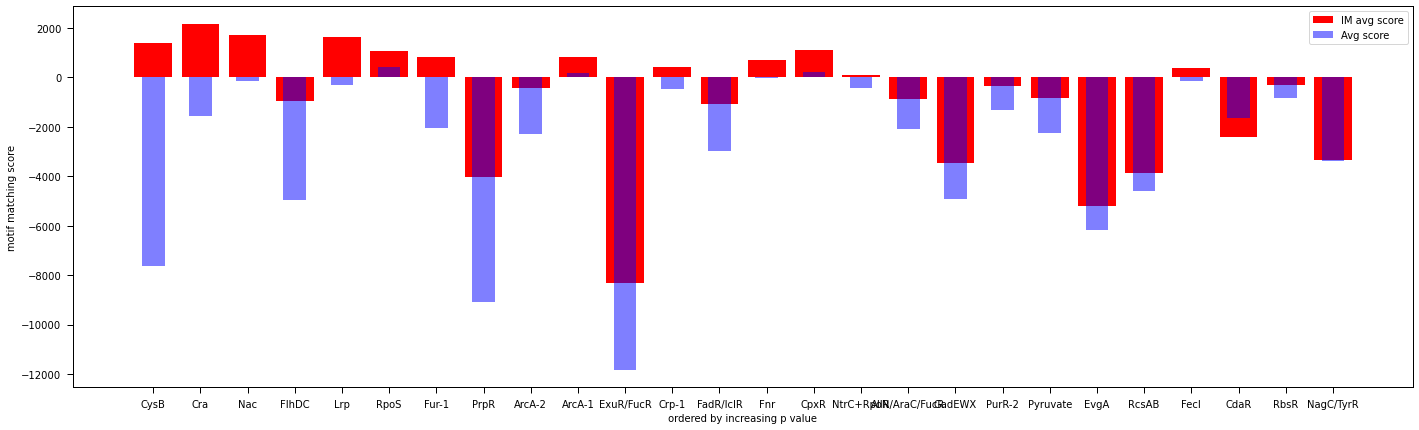

In [33]:
plt.figure(figsize=(24,7))
plt.bar(list(pvalueTable['IM']), list(pvalueTable['IM avg score']), width=0.8, 
        color='r', label='IM avg score')

plt.bar( list(pvalueTable['IM']), list(pvalueTable['avg score']), 
        width=0.6*0.8, color='b', alpha=0.5, label='Avg score')

plt.xticks( list(pvalueTable['IM']) )
plt.ylabel('motif matching score')
plt.xlabel(' ordered by increasing p value ')
plt.legend()
plt.show()

In [34]:
tf_motif_ttest=[]
for name in pwm_db.keys():
    if name == 'Crp':
        tfname = 'CRP'
    elif name == 'Fnr':
        tfname = 'FNR'
        
    else:
        tfname = name
    d={}
    d['TF'] = name    
    temp = []
    for i in range(len(data_table['gene'])):
        if data_table['gene'][i] in regulon_genes[tfname]:
            temp.append(data_table[name+' score'][i])
    d['Regulon avg score'] = sum(temp)/len(temp)
    d['avg score'] = sum(data_table[name+' score'])/len(data_table[name+' score'])
    d['p value'] = ttest_ind(temp, list(data_table[name+' score'])).pvalue 
    tf_motif_ttest.append(d)
    
pvalTable = pd.DataFrame(tf_motif_ttest)
pvalTable = pvalTable.dropna()
pvalTable = pvalTable.sort_values(by=['p value'])
pvalTable = pvalTable.reset_index()
pvalTable = pvalTable.drop(columns=['index'])
pvalTable

Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars


,TF,Regulon avg score,avg score,p value
0,Mlc,17.208000,-1.370723,1.252569e-127
1,Cbl,48.680000,-50.195498,7.121116e-127
2,PurR,9.592683,-1.242960,1.012670e-106
3,NarP,8.159459,2.757785,5.709479e-97
4,BaeR,17.822222,0.684629,4.525441e-78
...,...,...,...,...
63,CpxR,4.306024,3.705016,1.363919e-03
64,Lrp,4.380952,4.020263,2.280179e-03
65,CysB,0.179310,-1.633300,4.495696e-03
66,GadE,2.922917,2.018624,1.404662e-02


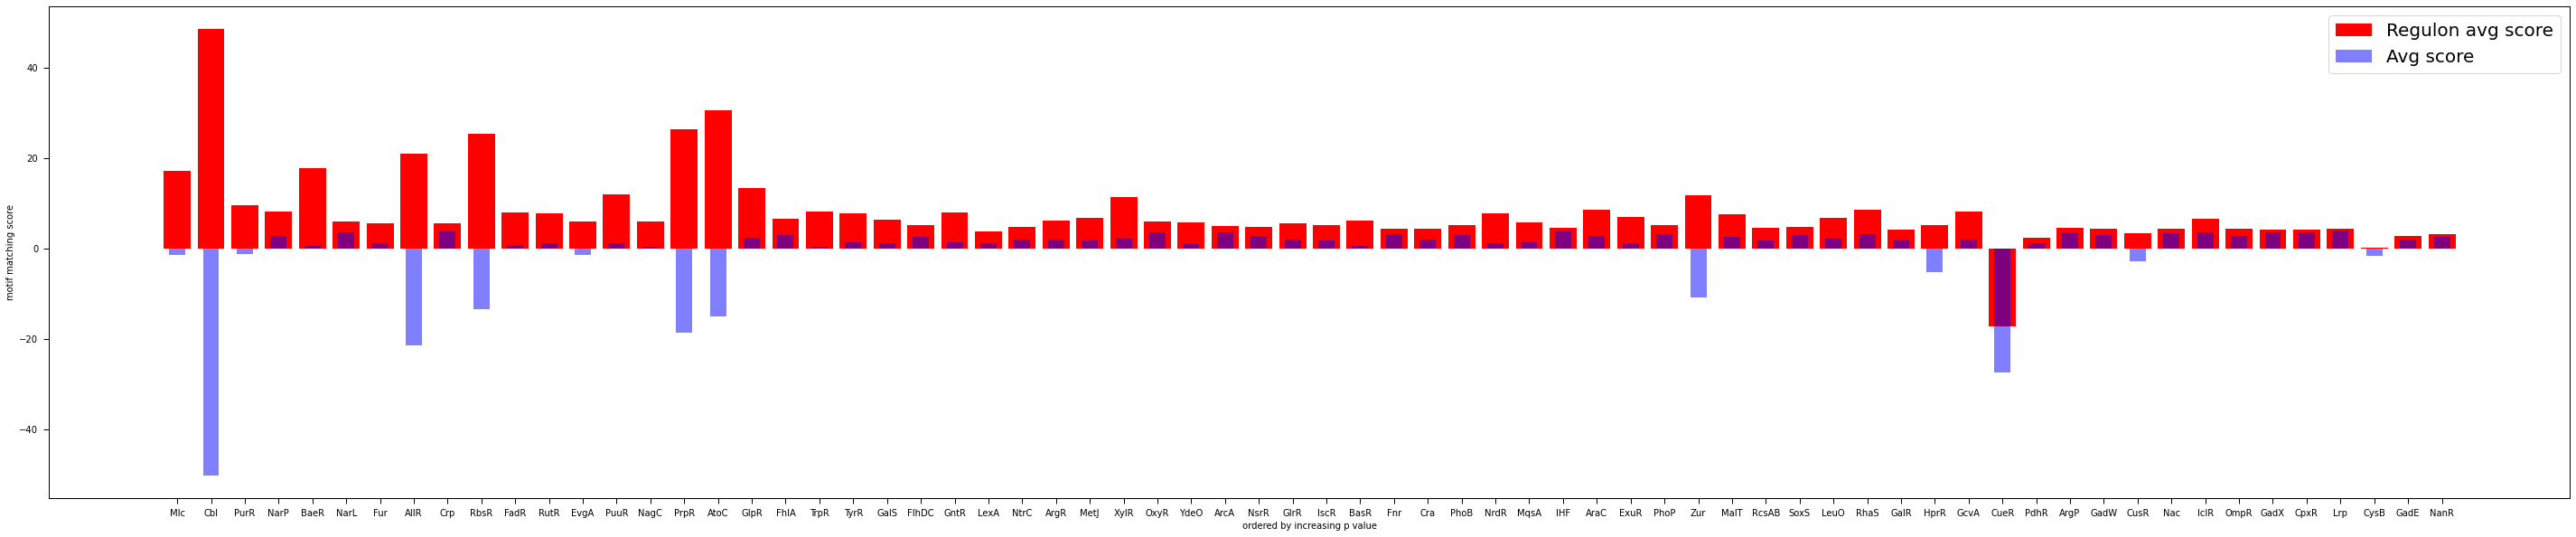

In [35]:
plt.figure(figsize=(50,10))
plt.bar(list(pvalTable['TF']), list(pvalTable['Regulon avg score']), width=0.8, 
        color='r', label='Regulon avg score')

plt.bar( list(pvalTable['TF']), list(pvalTable['avg score']), 
        width=0.6*0.8, color='b', alpha=0.5, label='Avg score')

plt.xticks( list(pvalTable['TF']) )
plt.ylabel('motif matching score')
plt.xlabel(' ordered by increasing p value ')
plt.legend(fontsize = 20)
plt.show()